<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/Lab04_penalized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)
scaler = StandardScaler()

# Artificial data
n = 1000  # Number of samples
p = 50    # Number of features
sigma = 1  # From random normal (for errors)

true_betas = np.zeros(p)
true_betas[:5] = np.random.uniform(-10, 10, 5)
print("True coefficients:", true_betas[:10], "...")

X_test = np.random.normal(0, 10, (n, p))
y_test = X_test @ true_betas# + np.random.normal(0, sigma, n)
X_test = scaler.fit_transform(X_test)

alphas = np.arange(0.001,1,step=(1-0.001)/50) # From 0.001 to 0.9sth
lambdas = alphas * n

bias_squared_ridge = []
variance_ridge = []
mse_ridge = []

bias_squared_lasso = []
variance_lasso = []
mse_lasso = []


n_trials = 100

for alpha in alphas:
    ridge_preds = []
    lasso_preds = []
    np.random.seed(42)

    for i in range(n_trials):
        # Generate new training data for each trial
        X_train = np.random.normal(0, 10, (n*2, p))
        y_train = X_train @ true_betas + np.random.normal(0, sigma, n*2)
        X_train = scaler.fit_transform(X_train)

        ridge = Ridge(alpha=alpha).fit(X_train, y_train)
        lasso = Lasso(alpha=alpha).fit(X_train, y_train)

        ridge_preds.append(ridge.predict(X_test))
        lasso_preds.append(lasso.predict(X_test))


    ridge_preds = np.array(ridge_preds)
    lasso_preds = np.array(lasso_preds)

    expected_ridge_pred = np.mean(ridge_preds, axis=0)
    expected_lasso_pred = np.mean(lasso_preds, axis=0)

    bias_squared_ridge.append(np.mean((expected_ridge_pred - y_test)**2))
    bias_squared_lasso.append(np.mean((expected_lasso_pred - y_test)**2))

    variance_ridge.append(np.mean(np.var(ridge_preds, axis=0)))
    variance_lasso.append(np.mean(np.var(lasso_preds, axis=0)))

    mse_ridge.append(mean_squared_error(y_test, expected_ridge_pred))
    mse_lasso.append(mean_squared_error(y_test, expected_lasso_pred))

    # Print progress
    print(f"Processed alpha = {alpha:.6f} ({np.where(alphas == alpha)[0][0] + 1}/{len(alphas)})")


True coefficients: [-2.50919762  9.01428613  4.63987884  1.97316968 -6.87962719  0.
  0.          0.          0.          0.        ] ...
Processed alpha = 0.001000 (1/50)
Processed alpha = 0.020980 (2/50)
Processed alpha = 0.040960 (3/50)
Processed alpha = 0.060940 (4/50)
Processed alpha = 0.080920 (5/50)
Processed alpha = 0.100900 (6/50)
Processed alpha = 0.120880 (7/50)
Processed alpha = 0.140860 (8/50)
Processed alpha = 0.160840 (9/50)
Processed alpha = 0.180820 (10/50)
Processed alpha = 0.200800 (11/50)
Processed alpha = 0.220780 (12/50)
Processed alpha = 0.240760 (13/50)
Processed alpha = 0.260740 (14/50)
Processed alpha = 0.280720 (15/50)
Processed alpha = 0.300700 (16/50)
Processed alpha = 0.320680 (17/50)
Processed alpha = 0.340660 (18/50)
Processed alpha = 0.360640 (19/50)
Processed alpha = 0.380620 (20/50)
Processed alpha = 0.400600 (21/50)
Processed alpha = 0.420580 (22/50)
Processed alpha = 0.440560 (23/50)
Processed alpha = 0.460540 (24/50)
Processed alpha = 0.480520 (25/

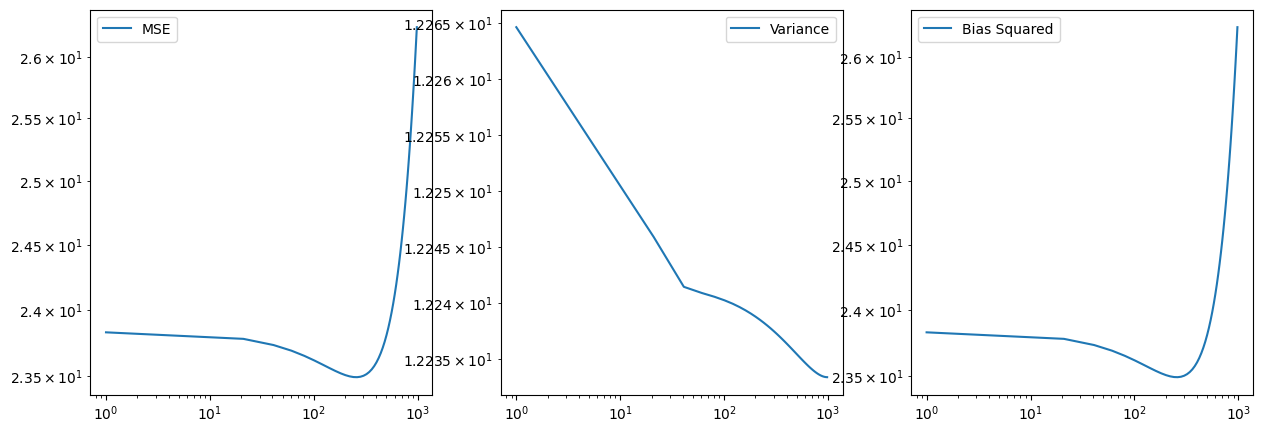

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot MSE, Variance, and Bias Squared with respective labels
ax[0].loglog(lambdas, mse_lasso, label='MSE')
ax[1].loglog(lambdas, variance_lasso, label='Variance')
ax[2].loglog(lambdas, bias_squared_lasso, label='Bias Squared')

# Add legends to each subplot
ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()